# KMeans Clustering

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

### Loading Data

In [3]:
df = pd.read_csv('wine.csv')
df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df['class_name'].value_counts()

Grignolino    71
Barolo        59
Barbera       48
Name: class_name, dtype: int64

In [5]:
df.shape

(178, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
class_label             178 non-null int64
class_name              178 non-null object
alcohol                 178 non-null float64
malic_acid              178 non-null float64
ash                     178 non-null float64
alcalinity_of_ash       178 non-null float64
magnesium               178 non-null int64
total_phenols           178 non-null float64
flavanoids              178 non-null float64
nonflavanoid_phenols    178 non-null float64
proanthocyanins         178 non-null float64
color_intensity         178 non-null float64
hue                     178 non-null float64
od280                   178 non-null float64
proline                 178 non-null int64
dtypes: float64(11), int64(3), object(1)
memory usage: 20.9+ KB


### Dropping target columns to check performance

In [7]:
X = df.drop(['class_label', 'class_name'], axis=1)
X.shape

(178, 13)

In [8]:
X.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


## Creating Pipeline

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
kmeans = KMeans(n_clusters=3, random_state=2)

In [10]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scale, kmeans)

### Model Fitting

In [11]:
pipeline.fit(X)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0))])

### Prediction

In [12]:
labels = pipeline.predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Model Evaluation using pandas cross-tab
Cleaning data for pandas cross-tab

In [13]:
df['class_label'] = df['class_label'].map({1: 0, 2: 1, 3: 2}).astype(int)
df['class_name'] = df['class_label'].map({0: 'Barolo', 1: 'Grignolino', 2: 'Barbera'}).astype(str)

In [14]:
df.head(2)

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,0,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [15]:
cross_df = pd.DataFrame({'labels':labels, 'class':df['class_name']})
cross_df.head(2)

,class,labels
0,Barolo,1
1,Barolo,1


### Performance
Below we can see that our model performed really well after scaling.

In [16]:
ct = pd.crosstab(cross_df['labels'], cross_df['class'])
print(ct)

class   Barbera  Barolo  Grignolino
labels                             
0             0       0          65
1             0      59           3
2            48       0           3


## Elbow-method of selecting number of clusters
Good clustering algorithm has low inertia but not too many clusters, so we pick number of clusters as soon as inertia seriously starts to decline.

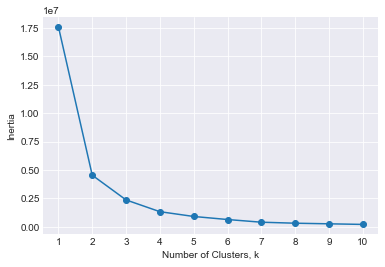

In [18]:
ks = np.arange(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o');
plt.xlabel('Number of Clusters, k');
plt.ylabel('Inertia');
plt.xticks(ks);
plt.show()

## TSNE Plot
TSNE helps us visualize, multi-dimensional data into 2d plots. Axis on TSNE doesn't mean anything.

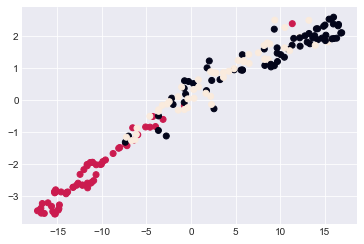

In [38]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=10)
transformed = tsne.fit_transform(X)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=labels);